https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler
import random
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


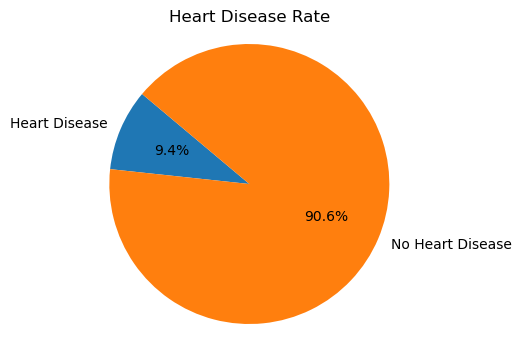

In [3]:
hd = (df["HeartDiseaseorAttack"] == 1.0).sum()
nohd = (df["HeartDiseaseorAttack"] == 0.0).sum()

sizes = [hd, nohd]
labels = ['Heart Disease', 'No Heart Disease']

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Heart Disease Rate')

plt.axis('equal')
plt.show()

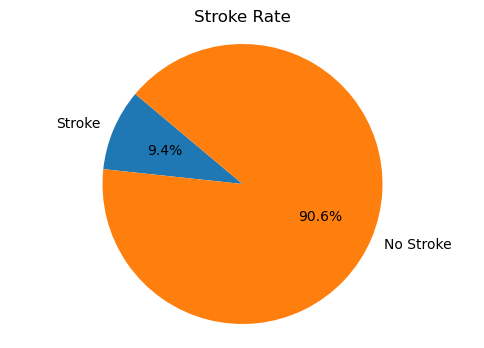

In [4]:
st = (df["Stroke"] == 1.0).sum()
nost = (df["Stroke"] == 0.0).sum()

sizes = [hd, nohd]
labels = ['Stroke', 'No Stroke']

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Stroke Rate')

plt.axis('equal')
plt.show()

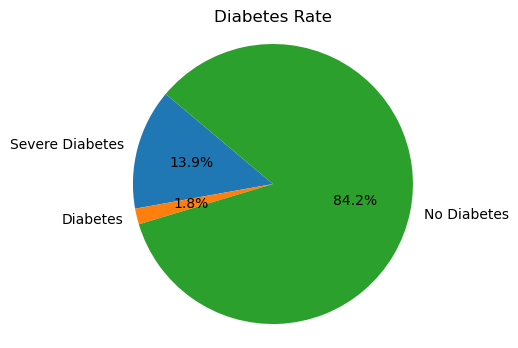

In [5]:
sdb = (df["Diabetes"] == 2.0).sum()
db = (df["Diabetes"] == 1.0).sum()
nodb = (df["Diabetes"] == 0.0).sum()

sizes = [sdb, db, nodb]
labels = ['Severe Diabetes', 'Diabetes', 'No Diabetes']

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Rate')

plt.axis('equal')
plt.show()

C:\Users\smhrd\AppData\Local\Temp\ipykernel_11272\1954189311.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\smhrd\AppData\Local\Temp\ipykernel_11272\1954189311.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\smhrd\AppData\Local\Temp\ipykernel_11272\1954189311.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\smhrd\AppData\Local\Temp\ipykernel_11272\1954189311.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\smhrd\AppData\Local\Temp\ipykernel_11272\1954189311.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\smhrd\AppData\Local\Temp\ipykernel_11272\1954189311.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\smhrd\AppData\Local\Temp\ipykernel_11272\1954189311.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\smhr

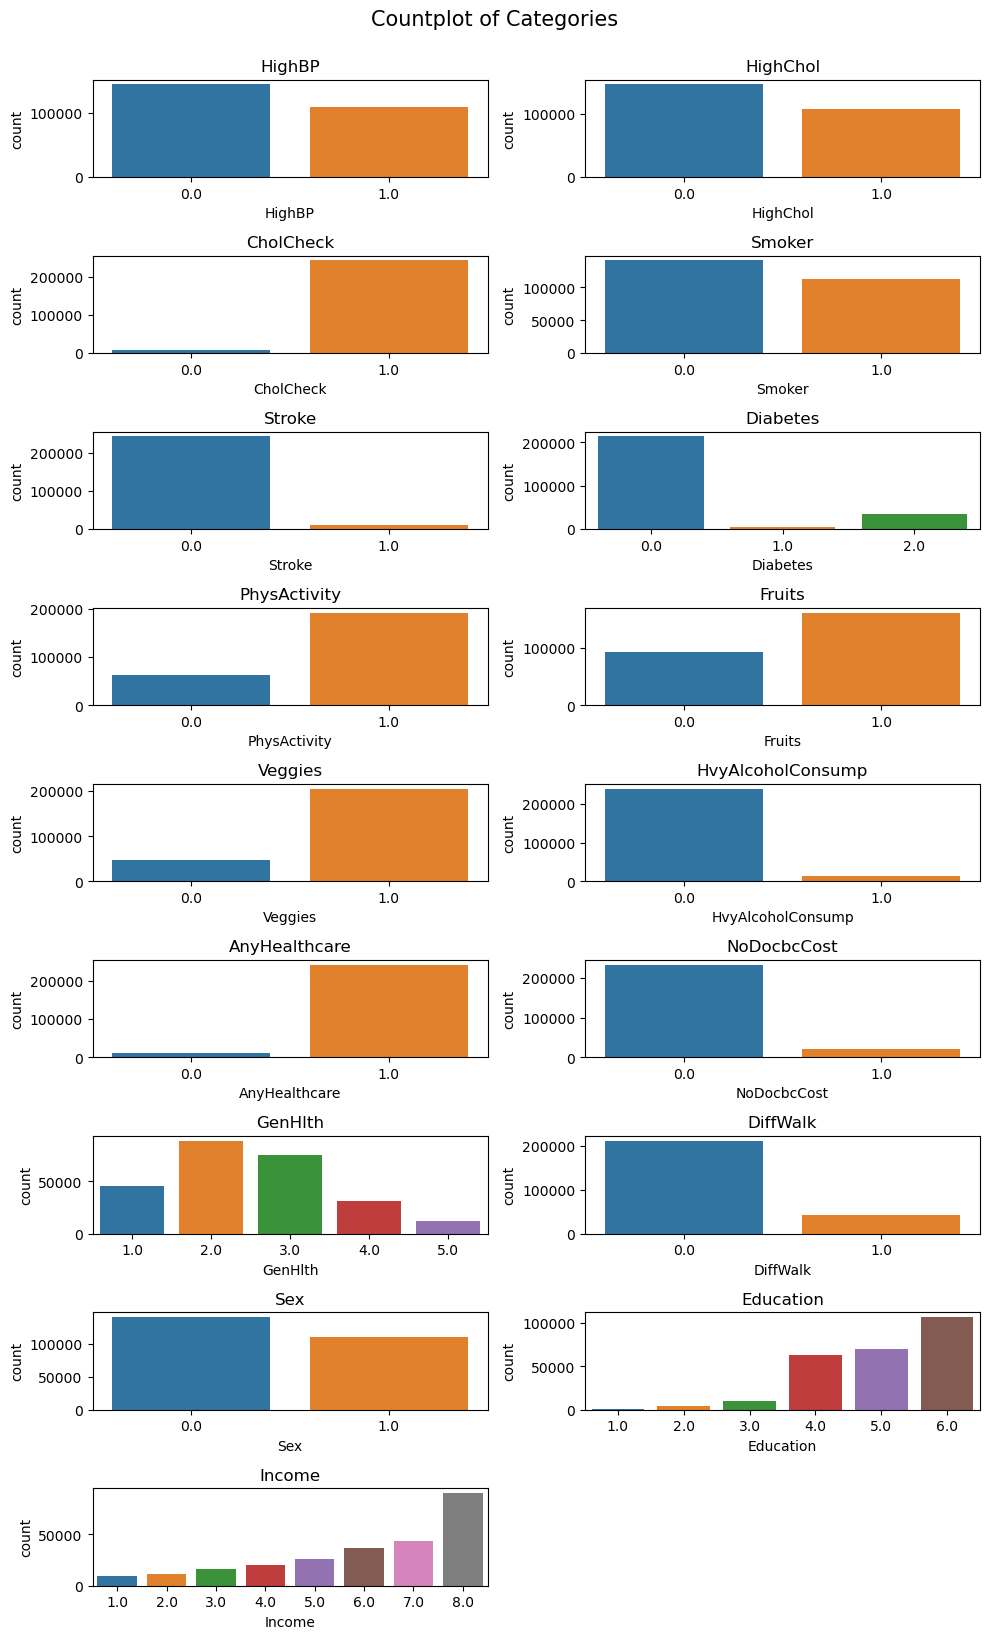

In [6]:
col = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']
plt.figure(figsize=(10,30))
for i,column in enumerate(col):
    plt.subplot(len(col), 2, i+1)
    plt.suptitle("Countplot of Categories", fontsize=15, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [7]:
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [8]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['BMI', 'MentHlth', 'Age']
binary_features = ['HighBP', 'HighChol', 'Stroke', 'Diabetes', 'Smoker','DiffWalk','HvyAlcoholConsump']

# Scale numerical 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Concatenate scaled 
X_train_final = np.concatenate([X_train_scaled, X_train[binary_features].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[binary_features].values], axis=1)

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [46]:
cols_to_scale1 = ['BMI', 'GenHlth', 'MentHlth', 'Age']
#scaler = StandardScaler()
#df[cols_to_scale1] = scaler.fit_transform(df[cols_to_scale1])
#df

##### RobustScaler

In [47]:
scaler = RobustScaler()
df[cols_to_scale1] = scaler.fit_transform(df[cols_to_scale1])
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,1.857143,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,9.0,15.0,1.0,0.0,0.25,4.0,3.0
1,0.0,0.0,0.0,0.0,-0.285714,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.25,6.0,1.0
2,0.0,1.0,1.0,1.0,0.142857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,15.0,30.0,1.0,0.0,0.25,4.0,8.0
3,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,3.0,6.0
4,0.0,1.0,1.0,1.0,-0.428571,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.5,0.0,0.0,0.0,0.75,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,2.571429,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,1.0,-0.75,6.0,7.0
253676,0.0,1.0,1.0,1.0,-1.285714,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.75,2.0,4.0
253677,0.0,0.0,0.0,1.0,0.142857,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.50,5.0,2.0
253678,0.0,1.0,0.0,1.0,-0.571429,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.25,5.0,1.0


In [12]:
## df

In [13]:
# 타겟 변수와 특성 분리
X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]

# 학습용 및 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Logistic (Standard Scaler & Heart Disease)
 - Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
 - Training Accuracy: 0.7541242904446547
 - Test Accuracy: 0.7552231157363608
 - F1-Score: 0.6124745341343116
 - Precision Score: 0.609809162407756
 - Recall: 0.7703643269785576

##### Logistic (Robust Scaler & Heart Disease)
 - Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
 - Training Accuracy: 0.7548190633869442
 - Test Accuracy: 0.7559129612109745
 - F1-Score: 0.6128475600621512
 - Precision Score: 0.6099004921423313
 - Recall: 0.770087106116423

In [14]:
log_reg_sm = LogisticRegression()

pipeline_log = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
log_param_grid = {
    'classifier__C': [1],
    'classifier__penalty': ['l2']
}

grid_log = GridSearchCV(estimator=pipeline_log, param_grid=log_param_grid, scoring='roc_auc', cv=5)

grid_log.fit(X_train, y_train)
cv_score = grid_log.best_score_
best_log = grid_log.best_estimator_
print(f"Best Parameters: {grid_log.best_params_}")

# Make predictions on the test data
y_trlog = best_log.predict(X_train)
y_predlog = best_log.predict(X_test)
tr_accuracy_log = accuracy_score(y_train, y_trlog)

print(f"Training Accuracy: {tr_accuracy_log}")

test_accuracy_log = accuracy_score(y_test, y_predlog)

print(f"Test Accuracy: {test_accuracy_log}")
print(classification_report(y_test, y_predlog))
print(f"F1-Score: {f1_score(y_test, y_predlog, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predlog, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predlog, average='macro')}")

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Training Accuracy: 0.7556961526332387
Test Accuracy: 0.7572138126773889
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     45968
         1.0       0.25      0.79      0.38      4768

    accuracy                           0.76     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.76      0.80     50736

F1-Score: 0.6138234063955701
Precision Score: 0.6103512978048702
Recall: 0.7704290422634246


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
log_cm = confusion_matrix(y_test, y_predlog)
y_pred_probalog = best_log.predict_proba(X_test)[:,1]
best_log.predict_proba(X_test).shape
best_log.predict_proba(X_test)[ : , 1 ]
auc_lr = roc_auc_score(y_test, y_pred_probalog)
print("AUC for logistic regression:", roc_auc_score(y_test, y_pred_probalog)  )

AUC for logistic regression: 0.8463259138031827


##### DecisionTree (Standard Scaler & Heart Disease)
 - Training Accuracy: 0.755060509303059
 - Test Accuracy: 0.7564451277199622
 - F1-Score: 0.6132062387637036
 - Precision Score: 0.6100435833867951
 - Recall: 0.7700988227585224

##### DecisionTree (Robust Scaler & Heart Disease)
 - Training Accuracy: 0.7555039813938821
 - Test Accuracy: 0.7566619362976978
 - F1-Score: 0.6133000435691233
 - Precision Score: 0.6100489767529691
 - Recall: 0.7699365052899361

In [16]:
dtc = DecisionTreeClassifier(random_state = 0)
pipeline_dt = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_dt.fit(X_train, y_train)

y_trdm = pipeline_dt.predict(X_train)
y_preddtsm = pipeline_dt.predict(X_test)
dt_train_accuracy = accuracy_score(y_train, y_trdm)
print(f"Training Accuracy: {dt_train_accuracy}")
dt_test_accuracy = accuracy_score(y_test, y_preddtsm)
print(f"Test Accuracy: {dt_test_accuracy}")
print(classification_report(y_test, y_preddtsm))
print(f"F1-Score: {f1_score(y_test, y_preddtsm, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_preddtsm, average='macro')}")
print(f"Recall: {recall_score(y_test, y_preddtsm, average='macro')}")

Training Accuracy: 0.7554054320403658
Test Accuracy: 0.7567407757805109
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     45968
         1.0       0.25      0.79      0.38      4768

    accuracy                           0.76     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.76      0.80     50736

F1-Score: 0.6136610441595802
Precision Score: 0.6103823233213874
Recall: 0.7709199002165499


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### SVC  (Standard Scaler & Heart Disease)
 - Training Accuracy: 0.7555286187322611
 - Test Accuracy: 0.7567013560391044
 - F1-Score: 0.6132741749069538
 - Precision Score: 0.6100064890917657
 - Recall: 0.7697702822739834

##### SVC (Robust Scaler & Heart Disease)
 - Training Accuracy: 0.7547352964364554
 - Test Accuracy: 0.7559918006937875
 - F1-Score: 0.6129137556701596
 - Precision Score: 0.6099349223644992
 - Recall: 0.7701306146440945

In [17]:
linear_svc = LinearSVC(random_state = 22)
pipeline_svc = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_svc.fit(X_train, y_train)

y_trsvc = pipeline_svc.predict(X_train)
tr_accuracy_svc = accuracy_score(y_train, y_trsvc)
print(f"Training Accuracy: {tr_accuracy_svc}")
y_predsvc = pipeline_svc.predict(X_test)
test_accuracy_svc = accuracy_score(y_test, y_predsvc)
print(f"Test Accuracy: {test_accuracy_svc}")
print(classification_report(y_test, y_predsvc))
print(f"F1-Score: {f1_score(y_test, y_predsvc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predsvc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predsvc, average='macro')}")

Training Accuracy: 0.7535871964679912
Test Accuracy: 0.7542573320719016
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     45968
         1.0       0.25      0.79      0.38      4768

    accuracy                           0.75     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.75      0.80     50736

F1-Score: 0.6119292935104224
Precision Score: 0.6096596110279929
Recall: 0.7706772452736307


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### KNN (Standard Scaler & Heart Disease)
 - Training Accuracy: 0.7554497792494481
 - Test Accuracy: 0.7566422264269946
 - F1-Score: 0.6133719383590867
 - Precision Score: 0.6101299889617412
 - Recall: 0.7702075940777009

##### KNN (Robust Scaler & Heart Disease)
 - Training Accuracy: 0.7553315200252286
 - Test Accuracy: 0.7565436770734784
 - F1-Score: 0.6132596003460711
 - Precision Score: 0.6100568874962603
 - Recall: 0.7700592197782175

In [18]:
knn = KNeighborsClassifier()
pipeline_knn = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_knn.fit(X_train, y_train)

y_trknn = pipeline_knn.predict(X_train)
tr_accuracy_knn = accuracy_score(y_train, y_trknn)
print(f"Training Accuracy: {tr_accuracy_knn}")
y_predknn = pipeline_knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_predknn)
print(f"Test Accuracy: {test_accuracy_knn}")
print(classification_report(y_test, y_predknn))
print(f"F1-Score: {f1_score(y_test, y_predknn, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predknn, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predknn, average='macro')}")

Training Accuracy: 0.755582820876695
Test Accuracy: 0.7565830968148849
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     45968
         1.0       0.25      0.78      0.38      4768

    accuracy                           0.76     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.76      0.80     50736

F1-Score: 0.6128497701805715
Precision Score: 0.6096255486861278
Recall: 0.7686711444436398


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### RandomForest (Standard Scaler & Heart Disease)
 - Training Accuracy: 0.7544642857142857
 - Test Accuracy: 0.7564451277199622
 - F1-Score: 0.613134474808289
 - Precision Score: 0.610093466107617
 - Recall: 0.7704995976191199

##### RandomForest (Robust Scaler & Heart Disease)
 - Training Accuracy: 0.7523011274046042
 - Test Accuracy: 0.7566619362976978
 - F1-Score: 0.611795711157387
 - Precision Score: 0.6095316053860264
 - Recall: 0.7702904135821359

In [19]:
rfc = RandomForestClassifier(random_state = 0)
pipeline_rfc = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_rfc.fit(X_train, y_train)

y_trrfc = pipeline_rfc.predict(X_train)
y_predrfc = pipeline_rfc.predict(X_test)
rfc_train_accuracy = accuracy_score(y_train, y_trrfc)
print(f"Training Accuracy: {rfc_train_accuracy}")
rfc_test_accuracy = accuracy_score(y_test, y_preddtsm)
print(f"Test Accuracy: {rfc_test_accuracy}")
print(classification_report(y_test, y_predrfc))
print(f"F1-Score: {f1_score(y_test, y_predrfc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predrfc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predrfc, average='macro')}")

Training Accuracy: 0.7554349968464207
Test Accuracy: 0.7567407757805109
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     45968
         1.0       0.25      0.79      0.38      4768

    accuracy                           0.76     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.76      0.80     50736

F1-Score: 0.613428952014101
Precision Score: 0.610261343740644
Recall: 0.7707676203696998


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### GradientBoosting (Standard Scaler & Heart Disease)
 - Training Accuracy: 0.7544642857142857
 - Test Accuracy: 0.7541982024597919
 - F1-Score: 0.611850550242198
 - Precision Score: 0.6096042106215044
 - Recall: 0.7705506252379829

##### GradientBoosting (Robust Scaler & Heart Disease)
 - Training Accuracy: 0.7523011274046042
 - Test Accuracy: 0.7569970040996531
 - F1-Score: 0.6135523689151733
 - Precision Score: 0.6101662612814878
 - Recall: 0.7700274278926456

In [20]:
gbc = GradientBoostingClassifier()
pipeline_gbc = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_gbc.fit(X_train, y_train)

y_trgbc = pipeline_rfc.predict(X_train)
y_predgbc = pipeline_rfc.predict(X_test)
gbc_train_accuracy = accuracy_score(y_train, y_trrfc)
print(f"Training Accuracy: {gbc_train_accuracy}")
gbc_test_accuracy = accuracy_score(y_test, y_predgbc)
print(f"Test Accuracy: {gbc_test_accuracy}")
print(classification_report(y_test, y_predgbc))
print(f"F1-Score: {f1_score(y_test, y_predgbc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predgbc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predgbc, average='macro')}")

Training Accuracy: 0.7554349968464207
Test Accuracy: 0.7566028066855881
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     45968
         1.0       0.25      0.79      0.38      4768

    accuracy                           0.76     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.76      0.80     50736

F1-Score: 0.6134271962562933
Precision Score: 0.610202334574001
Recall: 0.7704678057335479


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
X = df.drop('Stroke', axis=1)
y = df['Stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['BMI', 'MentHlth', 'Age']
binary_features = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Diabetes', 'Smoker','DiffWalk','HvyAlcoholConsump']

# Scale numerical 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Concatenate scaled 
X_train_final = np.concatenate([X_train_scaled, X_train[binary_features].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[binary_features].values], axis=1)

##### Logistic (Standard & Stroke)
 - Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
 - Training Accuracy: 0.7528234389782403
 - Test Accuracy: 0.7531338694418165
 - F1-Score: 0.5247063873177364
 - Precision Score: 0.5490089103562531
 - Recall: 0.74610412244639

##### Logistic (Robust & Stroke)
 - Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
 - Training Accuracy: 0.7534492273730684
 - Test Accuracy: 0.7540799432355724
 - F1-Score: 0.5251777732488088
 - Precision Score: 0.5490933755236586
 - Recall: 0.745898744988438

In [31]:
log_reg_sm = LogisticRegression()

pipeline_log = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
log_param_grid = {
    'classifier__C': [1],
    'classifier__penalty': ['l2']
}

grid_log = GridSearchCV(estimator=pipeline_log, param_grid=log_param_grid, scoring='roc_auc', cv=5)

grid_log.fit(X_train, y_train)
cv_score = grid_log.best_score_
best_log = grid_log.best_estimator_
print(f"Best Parameters: {grid_log.best_params_}")

# Make predictions on the test data
y_trlog = best_log.predict(X_train)
y_predlog = best_log.predict(X_test)
tr_accuracy_log = accuracy_score(y_train, y_trlog)

print(f"Training Accuracy: {tr_accuracy_log}")

test_accuracy_log = accuracy_score(y_test, y_predlog)

print(f"Test Accuracy: {test_accuracy_log}")
print(classification_report(y_test, y_predlog))
print(f"F1-Score: {f1_score(y_test, y_predlog, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predlog, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predlog, average='macro')}")

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Training Accuracy: 0.7534492273730684
Test Accuracy: 0.7540799432355724
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     48679
         1.0       0.11      0.74      0.20      2057

    accuracy                           0.75     50736
   macro avg       0.55      0.75      0.53     50736
weighted avg       0.95      0.75      0.83     50736

F1-Score: 0.5251777732488088
Precision Score: 0.5490933755236586
Recall: 0.745898744988438


##### DecisionTree (Standard & Stroke)
 - Training Accuracy: 0.7527495269631032
 - Test Accuracy: 0.7529959003468937
 - F1-Score: 0.5247657503329716
 - Precision Score: 0.5491035702245034
 - Recall: 0.7467306260573032

##### DecisionTree (Robust & Stroke) 
 - Training Accuracy: 0.7525327183853674
 - Test Accuracy: 0.7531141595711132
 - F1-Score: 0.5246934474989633
 - Precision Score: 0.5490045529351202
 - Recall: 0.7460938510768056

In [32]:
dtc = DecisionTreeClassifier(random_state = 0)
pipeline_dt = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_dt.fit(X_train, y_train)

y_trdm = pipeline_dt.predict(X_train)
y_preddtsm = pipeline_dt.predict(X_test)
dt_train_accuracy = accuracy_score(y_train, y_trdm)
print(f"Training Accuracy: {dt_train_accuracy}")
dt_test_accuracy = accuracy_score(y_test, y_preddtsm)
print(f"Test Accuracy: {dt_test_accuracy}")
print(classification_report(y_test, y_preddtsm))
print(f"F1-Score: {f1_score(y_test, y_preddtsm, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_preddtsm, average='macro')}")
print(f"Recall: {recall_score(y_test, y_preddtsm, average='macro')}")

Training Accuracy: 0.7525327183853674
Test Accuracy: 0.7531141595711132
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     48679
         1.0       0.11      0.74      0.20      2057

    accuracy                           0.75     50736
   macro avg       0.55      0.75      0.52     50736
weighted avg       0.95      0.75      0.83     50736

F1-Score: 0.5246934474989633
Precision Score: 0.5490045529351202
Recall: 0.7460938510768056


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### SVC (Standard & Stroke)
 - Training Accuracy: 0.7529367707347839
 - Test Accuracy: 0.75309444970041
 - F1-Score: 0.5247805006360261
 - Precision Score: 0.5490836475941914
 - Recall: 0.7465491818392239

##### SVC (Robust &  Stroke) 
 - Training Accuracy: 0.7519315673289183
 - Test Accuracy: 0.7523651844843898
 - F1-Score: 0.5244017488486322
 - Precision Score: 0.5490061212478878
 - Recall: 0.7466347432966032

In [33]:
linear_svc = LinearSVC(random_state = 22)
pipeline_svc = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_svc.fit(X_train, y_train)

y_trsvc = pipeline_svc.predict(X_train)
tr_accuracy_svc = accuracy_score(y_train, y_trsvc)
print(f"Training Accuracy: {tr_accuracy_svc}")
y_predsvc = pipeline_svc.predict(X_test)
test_accuracy_svc = accuracy_score(y_test, y_predsvc)
print(f"Test Accuracy: {test_accuracy_svc}")
print(classification_report(y_test, y_predsvc))
print(f"F1-Score: {f1_score(y_test, y_predsvc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predsvc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predsvc, average='macro')}")

Training Accuracy: 0.7519315673289183
Test Accuracy: 0.7523651844843898
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     48679
         1.0       0.11      0.74      0.20      2057

    accuracy                           0.75     50736
   macro avg       0.55      0.75      0.52     50736
weighted avg       0.95      0.75      0.83     50736

F1-Score: 0.5244017488486322
Precision Score: 0.5490061212478878
Recall: 0.7466347432966032


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### KNN (Standard & Stroke)
 - Training Accuracy: 0.7535576316619363
 - Test Accuracy: 0.7536660359508042
 - F1-Score: 0.5252562523110589
 - Precision Score: 0.5492938003446226
 - Recall: 0.7473126536891749

##### KNN (Robust & Stroke)
 - Training Accuracy: 0.7532324187953326
 - Test Accuracy: 0.7536266162093976
 - F1-Score: 0.5251302323973107
 - Precision Score: 0.5492015578173965
 - Recall: 0.7468265088180033

In [34]:
knn = KNeighborsClassifier()
pipeline_knn = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_knn.fit(X_train, y_train)

y_trknn = pipeline_knn.predict(X_train)
tr_accuracy_knn = accuracy_score(y_train, y_trknn)
print(f"Training Accuracy: {tr_accuracy_knn}")
y_predknn = pipeline_knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_predknn)
print(f"Test Accuracy: {test_accuracy_knn}")
print(classification_report(y_test, y_predknn))
print(f"F1-Score: {f1_score(y_test, y_predknn, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predknn, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predknn, average='macro')}")

Training Accuracy: 0.7532324187953326
Test Accuracy: 0.7536266162093976
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     48679
         1.0       0.11      0.74      0.20      2057

    accuracy                           0.75     50736
   macro avg       0.55      0.75      0.53     50736
weighted avg       0.95      0.75      0.83     50736

F1-Score: 0.5251302323973107
Precision Score: 0.5492015578173965
Recall: 0.7468265088180033


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### RandomForest (Standard & Stroke)
 - Training Accuracy: 0.7516950488804793
 - Test Accuracy: 0.7529959003468937
 - F1-Score: 0.5241046301554989
 - Precision Score: 0.5489064869747348
 - Recall: 0.7463985017961614

##### RandomForest (Robust & Stroke)
 - Training Accuracy: 0.7523701119520656
 - Test Accuracy: 0.7531141595711132
 - F1-Score: 0.5247010401703114
 - Precision Score: 0.5490817928898912
 - Recall: 0.7466792692093811

In [35]:
rfc = RandomForestClassifier(random_state = 0)
pipeline_rfc = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_rfc.fit(X_train, y_train)

y_trrfc = pipeline_rfc.predict(X_train)
y_predrfc = pipeline_rfc.predict(X_test)
rfc_train_accuracy = accuracy_score(y_train, y_trrfc)
print(f"Training Accuracy: {rfc_train_accuracy}")
rfc_test_accuracy = accuracy_score(y_test, y_preddtsm)
print(f"Test Accuracy: {rfc_test_accuracy}")
print(classification_report(y_test, y_predrfc))
print(f"F1-Score: {f1_score(y_test, y_predrfc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predrfc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predrfc, average='macro')}")

Training Accuracy: 0.7523701119520656
Test Accuracy: 0.7531141595711132
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     48679
         1.0       0.11      0.74      0.20      2057

    accuracy                           0.75     50736
   macro avg       0.55      0.75      0.52     50736
weighted avg       0.95      0.75      0.83     50736

F1-Score: 0.5247010401703114
Precision Score: 0.5490817928898912
Recall: 0.7466792692093811


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### GradientBoosting (Standard & Stroke)
 - Training Accuracy: 0.7516950488804793
 - Test Accuracy: 0.7539222642699464
  - F1-Score: 0.5254248989434664
 - Precision Score: 0.5493507766319582
 - Recall: 0.7474461814937723

##### GradientBoosting (Robust & Stroke)
 - Training Accuracy: 0.7523701119520656
 - Test Accuracy: 0.7521286660359509
 - F1-Score: 0.5243463109039679
 - Precision Score: 0.5490373798570751
 - Recall: 0.7469770889935928

In [36]:
gbc = GradientBoostingClassifier()
pipeline_gbc = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_gbc.fit(X_train, y_train)

y_trgbc = pipeline_rfc.predict(X_train)
y_predgbc = pipeline_rfc.predict(X_test)
gbc_train_accuracy = accuracy_score(y_train, y_trrfc)
print(f"Training Accuracy: {gbc_train_accuracy}")
gbc_test_accuracy = accuracy_score(y_test, y_predgbc)
print(f"Test Accuracy: {gbc_test_accuracy}")
print(classification_report(y_test, y_predgbc))
print(f"F1-Score: {f1_score(y_test, y_predgbc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predgbc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predgbc, average='macro')}")

Training Accuracy: 0.7523701119520656
Test Accuracy: 0.7521286660359509
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     48679
         1.0       0.11      0.74      0.20      2057

    accuracy                           0.75     50736
   macro avg       0.55      0.75      0.52     50736
weighted avg       0.95      0.75      0.83     50736

F1-Score: 0.5243463109039679
Precision Score: 0.5490373798570751
Recall: 0.7469770889935928


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['BMI', 'MentHlth', 'Age']
binary_features = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 'Smoker','DiffWalk','HvyAlcoholConsump']

# Scale numerical 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Concatenate scaled 
X_train_final = np.concatenate([X_train_scaled, X_train[binary_features].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[binary_features].values], axis=1)

##### Logistic (Standard  & Diabetes)
 - Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
 - Training Accuracy: 0.6397577656890571 
 - Test Accuracy: 0.6421870072532324
 - F1-Score: 0.42513581339846995
 - Precision Score: 0.4448154759625103
 - Recall: 0.520792459073517

##### Logistic (Robust & Diabetes)
 - Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
 - Training Accuracy: 0.6439116209397666
 - Test Accuracy: 0.6466611479028698
  - F1-Score: 0.4272871260661309
 - Precision Score: 0.4456205334145153
 - Recall: 0.5233309157327012

In [48]:
log_reg_sm = LogisticRegression()

pipeline_log = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
log_param_grid = {
    'classifier__C': [1],
    'classifier__penalty': ['l2']
}

grid_log = GridSearchCV(estimator=pipeline_log, param_grid=log_param_grid, scoring='roc_auc', cv=5)

grid_log.fit(X_train, y_train)
cv_score = grid_log.best_score_
best_log = grid_log.best_estimator_
print(f"Best Parameters: {grid_log.best_params_}")

# Make predictions on the test data
y_trlog = best_log.predict(X_train)
y_predlog = best_log.predict(X_test)
tr_accuracy_log = accuracy_score(y_train, y_trlog)

print(f"Training Accuracy: {tr_accuracy_log}")

test_accuracy_log = accuracy_score(y_test, y_predlog)

print(f"Test Accuracy: {test_accuracy_log}")
print(classification_report(y_test, y_predlog))
print(f"F1-Score: {f1_score(y_test, y_predlog, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predlog, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predlog, average='macro')}")

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\smhrd\anaconda3\Lib\si

Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Training Accuracy: 0.6439116209397666
Test Accuracy: 0.6466611479028698
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.31      0.06       944
         2.0       0.35      0.59      0.44      6997

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736

F1-Score: 0.4272871260661309
Precision Score: 0.4456205334145153
Recall: 0.5233309157327012


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### DecisionTree (Standard  & Diabetes)
 - Training Accuracy: 0.6402554399243141
 - Test Accuracy: 0.6418125197098707
 - F1-Score: 0.4250382334677452
 - Precision Score: 0.44611731555300177
 - Recall: 0.5216661539271668

##### DecisionTree (Robust & Diabetes)
 - Training Accuracy: 0.6426009145380006
 - Test Accuracy: 0.6452223273415326
 - F1-Score: 0.4265040167771044
 - Precision Score: 0.44623318476436663
 - Recall: 0.52221712168793

In [49]:
dtc = DecisionTreeClassifier(random_state = 0)
pipeline_dt = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_dt.fit(X_train, y_train)

y_trdm = pipeline_dt.predict(X_train)
y_preddtsm = pipeline_dt.predict(X_test)
dt_train_accuracy = accuracy_score(y_train, y_trdm)
print(f"Training Accuracy: {dt_train_accuracy}")
dt_test_accuracy = accuracy_score(y_test, y_preddtsm)
print(f"Test Accuracy: {dt_test_accuracy}")
print(classification_report(y_test, y_preddtsm))
print(f"F1-Score: {f1_score(y_test, y_preddtsm, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_preddtsm, average='macro')}")
print(f"Recall: {recall_score(y_test, y_preddtsm, average='macro')}")

Training Accuracy: 0.6426009145380006
Test Accuracy: 0.6452223273415326
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.33      0.06       944
         2.0       0.35      0.58      0.44      6997

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736

F1-Score: 0.4265040167771044
Precision Score: 0.44623318476436663
Recall: 0.52221712168793


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### SVC (Standard  & Diabetes)
 - Training Accuracy: 0.6377375039419741
 - Test Accuracy: 0.6397626931567328
 - F1-Score: 0.4249900189785704
 - Precision Score: 0.44653037534753054
 - Recall: 0.5218126552581454

###### SVC (Robust & Diabetes)
 - Training Accuracy: 0.6389250236518449
 - Test Accuracy: 0.6416154210028382
 - F1-Score: 0.4252735017088569
 - Precision Score: 0.44581479505924987
 - Recall: 0.5224254322314666

In [50]:
linear_svc = LinearSVC(random_state = 22)
pipeline_svc = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_svc.fit(X_train, y_train)

y_trsvc = pipeline_svc.predict(X_train)
tr_accuracy_svc = accuracy_score(y_train, y_trsvc)
print(f"Training Accuracy: {tr_accuracy_svc}")
y_predsvc = pipeline_svc.predict(X_test)
test_accuracy_svc = accuracy_score(y_test, y_predsvc)
print(f"Test Accuracy: {test_accuracy_svc}")
print(classification_report(y_test, y_predsvc))
print(f"F1-Score: {f1_score(y_test, y_predsvc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predsvc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predsvc, average='macro')}")

Training Accuracy: 0.6389250236518449
Test Accuracy: 0.6416154210028382
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.33      0.06       944
         2.0       0.35      0.58      0.44      6997

    accuracy                           0.64     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.64      0.72     50736

F1-Score: 0.4252735017088569
Precision Score: 0.44581479505924987
Recall: 0.5224254322314666


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### KNN (Standard  & Diabetes)
 - Training Accuracy: 0.6406841296121097
 - Test Accuracy: 0.6435469883317565
 - F1-Score: 0.425365910255407
 - Precision Score: 0.44480277017639175
 - Recall: 0.5216749125305178

###### KNN (Robust & Diabetes)
 - Training Accuracy: 0.6391861794386628
 - Test Accuracy: 0.6419110690633869
 - F1-Score: 0.42490789133544365
 - Precision Score: 0.4455614954580675
 - Recall: 0.5209615878671365

In [51]:
knn = KNeighborsClassifier()
pipeline_knn = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_knn.fit(X_train, y_train)

y_trknn = pipeline_knn.predict(X_train)
tr_accuracy_knn = accuracy_score(y_train, y_trknn)
print(f"Training Accuracy: {tr_accuracy_knn}")
y_predknn = pipeline_knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_predknn)
print(f"Test Accuracy: {test_accuracy_knn}")
print(classification_report(y_test, y_predknn))
print(f"F1-Score: {f1_score(y_test, y_predknn, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predknn, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predknn, average='macro')}")

Training Accuracy: 0.6391861794386628
Test Accuracy: 0.6419110690633869
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.33      0.06       944
         2.0       0.35      0.57      0.44      6997

    accuracy                           0.64     50736
   macro avg       0.45      0.52      0.42     50736
weighted avg       0.85      0.64      0.72     50736

F1-Score: 0.42490789133544365
Precision Score: 0.4455614954580675
Recall: 0.5209615878671365


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### RandomForest (Standard  & Diabetes)
 - Training Accuracy: 0.6408122437716809
 - Test Accuracy: 0.6418125197098707
  - F1-Score: 0.42541284805212976
 - Precision Score: 0.445316525687574
 - Recall: 0.5199993859754236

##### RandomForest (Robust & Diabetes)
 - Training Accuracy: 0.6372940318511511
 - Test Accuracy: 0.6452223273415326
 - F1-Score: 0.42421931039775024
 - Precision Score: 0.4455293221883663
 - Recall: 0.5196542767888791

In [52]:
rfc = RandomForestClassifier(random_state = 0)
pipeline_rfc = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_rfc.fit(X_train, y_train)

y_trrfc = pipeline_rfc.predict(X_train)
y_predrfc = pipeline_rfc.predict(X_test)
rfc_train_accuracy = accuracy_score(y_train, y_trrfc)
print(f"Training Accuracy: {rfc_train_accuracy}")
rfc_test_accuracy = accuracy_score(y_test, y_preddtsm)
print(f"Test Accuracy: {rfc_test_accuracy}")
print(classification_report(y_test, y_predrfc))
print(f"F1-Score: {f1_score(y_test, y_predrfc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predrfc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predrfc, average='macro')}")

Training Accuracy: 0.6372940318511511
Test Accuracy: 0.6452223273415326
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.33      0.06       944
         2.0       0.35      0.58      0.44      6997

    accuracy                           0.64     50736
   macro avg       0.45      0.52      0.42     50736
weighted avg       0.85      0.64      0.72     50736

F1-Score: 0.42421931039775024
Precision Score: 0.4455293221883663
Recall: 0.5196542767888791


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Gradient Boosting (Standard  & Diabetes)
 - Training Accuracy: 0.6408122437716809
 - Test Accuracy: 0.6442565436770735
 - F1-Score: 0.42621115352995415
 - Precision Score: 0.4460777542839285
 - Recall: 0.5206137410323635

##### Gradient Boosting (Robust & Diabetes)
 - Training Accuracy: 0.6372940318511511
 - Test Accuracy: 0.6437637969094923
 - F1-Score: 0.4263619164358989
 - Precision Score: 0.4464187279451504
 - Recall: 0.5236727896085599

In [53]:
gbc = GradientBoostingClassifier()
pipeline_gbc = imbpipeline(steps = [['smote', SMOTE()],['classifier', log_reg_sm]])
pipeline_gbc.fit(X_train, y_train)

y_trgbc = pipeline_rfc.predict(X_train)
y_predgbc = pipeline_rfc.predict(X_test)
gbc_train_accuracy = accuracy_score(y_train, y_trrfc)
print(f"Training Accuracy: {gbc_train_accuracy}")
gbc_test_accuracy = accuracy_score(y_test, y_predgbc)
print(f"Test Accuracy: {gbc_test_accuracy}")
print(classification_report(y_test, y_predgbc))
print(f"F1-Score: {f1_score(y_test, y_predgbc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predgbc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predgbc, average='macro')}")

Training Accuracy: 0.6372940318511511
Test Accuracy: 0.6437637969094923
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.33      0.06       944
         2.0       0.35      0.58      0.44      6997

    accuracy                           0.64     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.64      0.72     50736

F1-Score: 0.4263619164358989
Precision Score: 0.4464187279451504
Recall: 0.5236727896085599


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
